In [1]:
### Task to predict whether person has ckd or not?

## ckd-chronic kidney disease
## notckd-->> not crornic kidney disease

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from collections import Counter as c
import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('kidney_disease.csv')
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [4]:
df.describe()

id         age          bp          sg          al          su  \
count  400.000000  391.000000  388.000000  353.000000  354.000000  351.000000   
mean   199.500000   51.483376   76.469072    1.017408    1.016949    0.450142   
std    115.614301   17.169714   13.683637    0.005717    1.352679    1.099191   
min      0.000000    2.000000   50.000000    1.005000    0.000000    0.000000   
25%     99.750000   42.000000   70.000000    1.010000    0.000000    0.000000   
50%    199.500000   55.000000   80.000000    1.020000    0.000000    0.000000   
75%    299.250000   64.500000   80.000000    1.020000    2.000000    0.000000   
max    399.000000   90.000000  180.000000    1.025000    5.000000    5.000000   

              bgr          bu          sc         sod         pot        hemo  
count  356.000000  381.000000  383.000000  313.000000  312.000000  348.000000  
mean   148.036517   57.425722    3.072454  137.528754    4.627244   12.526437  
std     79.281714   50.503006    5.741126   10.408752    3.193904    2.912587  
min     22.000000    1.500000    0.400000    4.500000    2.500000    3.100000  
25%     99.000000   27.000000    0.900000  135.000000    3.800000   10.300000  
50%    121.000000   42.000000    1.300000  138.000000    4.400000   12.650000  
75%    163.000000   66.000000    2.800000  142.000000    4.900000   15.000000  
max    490.000000  391.000000   76.000000  163.000000   47.000000   17.800000

In [5]:
df.info

<bound method DataFrame.info of       id   age    bp     sg   al   su     rbc        pc         pcc  \
0      0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent   
1      1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent   
2      2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent   
3      3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present   
4      4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent   
..   ...   ...   ...    ...  ...  ...     ...       ...         ...   
395  395  55.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
396  396  42.0  70.0  1.025  0.0  0.0  normal    normal  notpresent   
397  397  12.0  80.0  1.020  0.0  0.0  normal    normal  notpresent   
398  398  17.0  60.0  1.025  0.0  0.0  normal    normal  notpresent   
399  399  58.0  80.0  1.025  0.0  0.0  normal    normal  notpresent   

             ba  ...  pcv    wc   rc  htn   dm  cad appet   pe  ane  \
0    notpresent  ...   44  7800  5.2  yes  y

In [6]:
df.shape

(400, 26)

In [7]:
df.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

# rename column names to make it more user-friendly

In [8]:
columns=pd.read_csv('data_description.txt',sep='-')
columns=columns.reset_index()
columns.columns=['cols','abb_col_names']
columns

cols            abb_col_names
0               id                        id
1              age                       age
2               bp            blood pressure
3               sg          specific gravity
4               al                   albumin
5               su                     sugar
6              rbc           red blood cells
7               pc                  pus cell
8              pcc           pus cell clumps
9               ba                  bacteria
10             bgr      blood glucose random
11              bu                blood urea
12              sc          serum creatinine
13             sod                    sodium
14             pot                 potassium
15            hemo               haemoglobin
16             pcv        packed cell volume
17              wc    white blood cell count
18              rc      red blood cell count
19             htn               ypertension
20              dm         diabetes mellitus
21             cad   coronary artery disease
22           appet                  appetite
23              pe               pedal edema
24             ane                    anemia
25  classification                     class

In [9]:
df.columns=columns['abb_col_names'].values
df

id   age  blood pressure  specific gravity  albumin  sugar  \
0      0  48.0            80.0             1.020      1.0    0.0   
1      1   7.0            50.0             1.020      4.0    0.0   
2      2  62.0            80.0             1.010      2.0    3.0   
3      3  48.0            70.0             1.005      4.0    0.0   
4      4  51.0            80.0             1.010      2.0    0.0   
..   ...   ...             ...               ...      ...    ...   
395  395  55.0            80.0             1.020      0.0    0.0   
396  396  42.0            70.0             1.025      0.0    0.0   
397  397  12.0            80.0             1.020      0.0    0.0   
398  398  17.0            60.0             1.025      0.0    0.0   
399  399  58.0            80.0             1.025      0.0    0.0   

    red blood cells  pus cell pus cell clumps    bacteria  ...  \
0               NaN    normal      notpresent  notpresent  ...   
1               NaN    normal      notpresent  notpresent  ...   
2            normal    normal      notpresent  notpresent  ...   
3            normal  abnormal         present  notpresent  ...   
4            normal    normal      notpresent  notpresent  ...   
..              ...       ...             ...         ...  ...   
395          normal    normal      notpresent  notpresent  ...   
396          normal    normal      notpresent  notpresent  ...   
397          normal    normal      notpresent  notpresent  ...   
398          normal    normal      notpresent  notpresent  ...   
399          normal    normal      notpresent  notpresent  ...   

     packed cell volume  white blood cell count  red blood cell count  \
0                    44                    7800                   5.2   
1                    38                    6000                   NaN   
2                    31                    7500                   NaN   
3                    32                    6700                   3.9   
4                    35                    7300                   4.6   
..                  ...                     ...                   ...   
395                  47                    6700                   4.9   
396                  54                    7800                   6.2   
397                  49                    6600                   5.4   
398                  51                    7200                   5.9   
399                  53                    6800                   6.1   

     ypertension  diabetes mellitus  coronary artery disease appetite  \
0            yes                yes                       no     good   
1             no                 no                       no     good   
2             no                yes                       no     poor   
3            yes                 no                       no     poor   
4             no                 no                       no     good   
..           ...                ...                      ...      ...   
395           no                 no                       no     good   
396           no                 no                       no     good   
397           no                 no                       no     good   
398           no                 no                       no     good   
399           no                 no                       no     good   

    pedal edema anemia   class  
0            no     no     ckd  
1            no     no     ckd  
2            no    yes     ckd  
3           yes    yes     ckd  
4            no     no     ckd  
..          ...    ...     ...  
395          no     no  notckd  
396          no     no  notckd  
397          no     no  notckd  
398          no     no  notckd  
399          no     no  notckd  

[400 rows x 26 columns]

In [10]:
df.dtypes

id                           int64
age                        float64
blood pressure             float64
specific gravity           float64
albumin                    float64
sugar                      float64
red blood cells             object
 pus cell                   object
pus cell clumps             object
bacteria                    object
blood glucose random       float64
blood urea                 float64
serum creatinine           float64
sodium                     float64
potassium                  float64
haemoglobin                float64
packed cell volume          object
white blood cell count      object
red blood cell count        object
ypertension                 object
diabetes mellitus           object
coronary artery disease     object
appetite                    object
pedal edema                 object
anemia                      object
class                       object
dtype: object

In [11]:
features=['red_blood_cell_count','packed_cell_volume','white_blood_cell_count']

In [12]:
def convert_dtype(df,feature):
    df[feature] = pd.to_numeric(df[feature], errors='coerce')

In [13]:
features=['packed cell volume','white blood cell count','red blood cell count']
for i in features:
    convert_dtype(df,i)

In [14]:
#    Let's drop the id column. id column is seems to be an unique identifier for each row so we are dropping that it won't  help us to find any insights from the data

In [15]:
df.drop(["id"],axis=1,inplace=True) 

#  Extract Numerical & Categorical Features

In [16]:
def extract_cat_num(df):
    cat_col=[col for col in df.columns if df[col].dtype=='object']
    num_col=[col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col

In [17]:
cat_col,num_col=extract_cat_num(df)

In [18]:
cat_col

['red blood cells',
 ' pus cell',
 'pus cell clumps',
 'bacteria',
 'ypertension',
 'diabetes mellitus',
 'coronary artery disease',
 'appetite',
 'pedal edema',
 'anemia',
 'class']

In [19]:
num_col

['age',
 'blood pressure',
 'specific gravity',
 'albumin',
 'sugar',
 'blood glucose random',
 'blood urea',
 'serum creatinine',
 'sodium',
 'potassium',
 'haemoglobin',
 'packed cell volume',
 'white blood cell count',
 'red blood cell count']

# cleaning categorical data

In [20]:
cat_col=[col for col in df.columns if df[col].dtype=='object']
for col in cat_col:
    print('{} has {} values '.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values 


 pus cell has ['normal' 'abnormal' nan] values 


pus cell clumps has ['notpresent' 'present' nan] values 


bacteria has ['notpresent' 'present' nan] values 


ypertension has ['yes' 'no' nan] values 


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values 


coronary artery disease has ['no' 'yes' '\tno' nan] values 


appetite has ['good' 'poor' nan] values 


pedal edema has ['no' 'yes' nan] values 


anemia has ['no' 'yes' nan] values 


class has ['ckd' 'ckd\t' 'notckd'] values 




In [21]:
#Replace incorrect values

df['diabetes mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary artery disease'] = df['coronary artery disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = 'ckd\t', value = 'ckd')



for col in cat_col:
    print('{} has {} values  '.format(col, df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values  


 pus cell has ['normal' 'abnormal' nan] values  


pus cell clumps has ['notpresent' 'present' nan] values  


bacteria has ['notpresent' 'present' nan] values  


ypertension has ['yes' 'no' nan] values  


diabetes mellitus has ['yes' 'no' nan] values  


coronary artery disease has ['no' 'yes' nan] values  


appetite has ['good' 'poor' nan] values  


pedal edema has ['no' 'yes' nan] values  


anemia has ['no' 'yes' nan] values  


class has ['ckd' 'notckd'] values  




# Assigning random values to missing(NaN) Values# 

In [22]:
data=df.copy()

# Categorical features using Random value Imputation & Mode imputation

In [23]:
data[cat_col].isnull().sum()

red blood cells            152
 pus cell                   65
pus cell clumps              4
bacteria                     4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

#  Random_value_imputation for "red blood cells" & "pus cell"


In [24]:
def Random_value_imputation(feature):
    random_sample=data[feature].dropna().sample(data[feature].isnull().sum())               
    random_sample.index=data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature]=random_sample

Random_value_imputation(' pus cell')
Random_value_imputation('red blood cells')
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            4
bacteria                   4
ypertension                2
diabetes mellitus          2
coronary artery disease    2
appetite                   1
pedal edema                1
anemia                     1
class                      0
dtype: int64

#### mode_imputation for all other categorical features

In [25]:
def mode_imputation(feature):
    mode=data[feature].mode()[0]
    data[feature]=data[feature].fillna(mode)
    
for col in cat_col:
    mode_imputation(col)
    
data[cat_col].isnull().sum()

red blood cells            0
 pus cell                  0
pus cell clumps            0
bacteria                   0
ypertension                0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

#### Numerical features using Random value Imputation

In [26]:
num_col=[col for col in df.columns if df[col].dtype!='object']
data[num_col].isnull().sum()

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64

In [27]:
for col in num_col:
    Random_value_imputation(col)
    
data[num_col].isnull().sum()

age                       0
blood pressure            0
specific gravity          0
albumin                   0
sugar                     0
blood glucose random      0
blood urea                0
serum creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed cell volume        0
white blood cell count    0
red blood cell count      0
dtype: int64

# Data Visualization

####  label distribution for Class data

Text(0.5, 1.0, 'target Class')

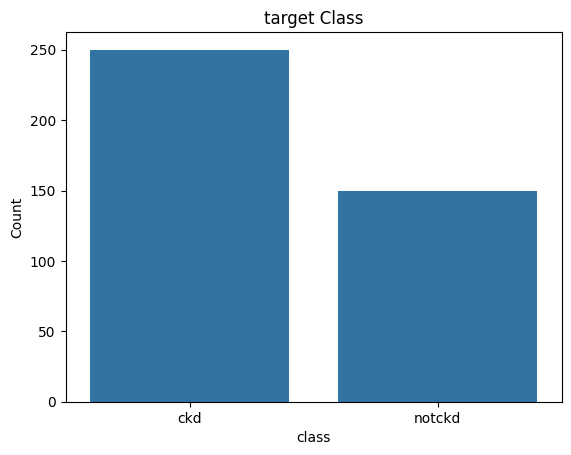

In [28]:
sns.countplot(x='class',data=data)
plt.xlabel("class")
plt.ylabel("Count")
plt.title("target Class")

###  Label distribution for Numerical data 

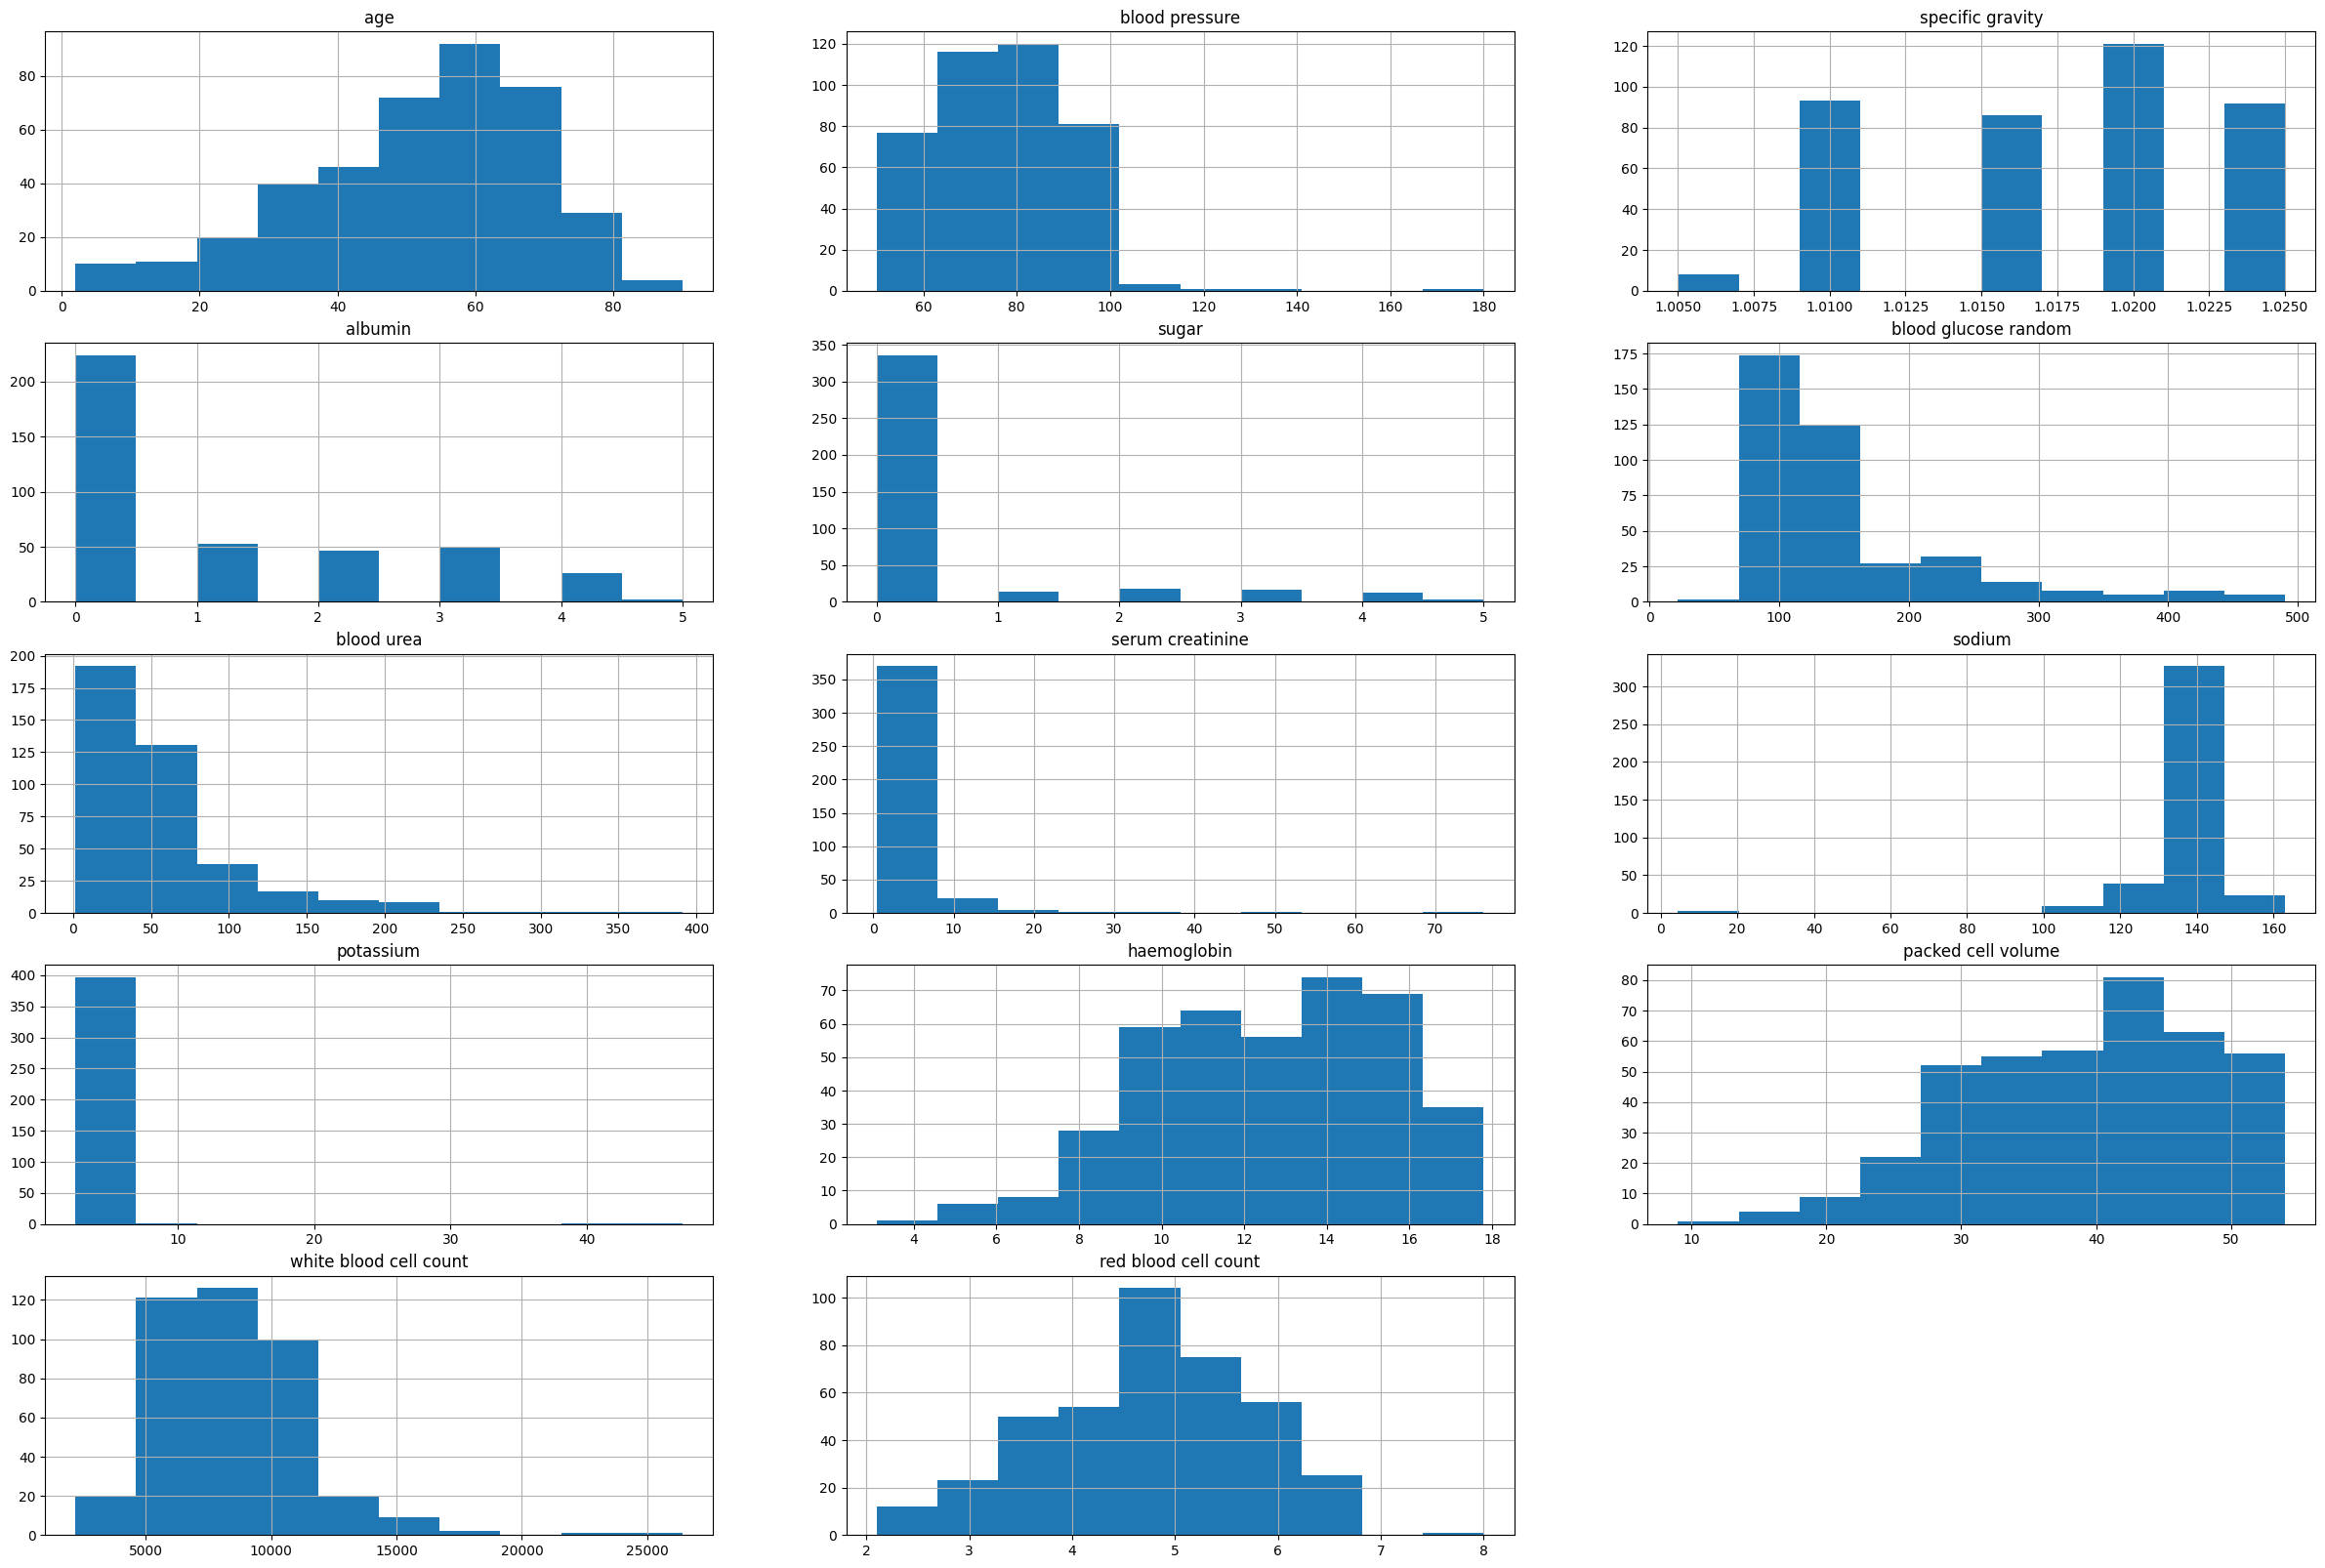

In [29]:
plt.figure(figsize=(30,20))
for i,feature in enumerate(num_col):
    plt.subplot(5,3,i+1)
    data[feature].hist()
    plt.title(feature)

    Observations:
        1.age looks a bit left skewed
        2.Blood gluscose random is right skewed
        3.Blood Urea is also a bit right skewed
        4.Rest of the features are lightly skewed

## Label distribution for Categorical data

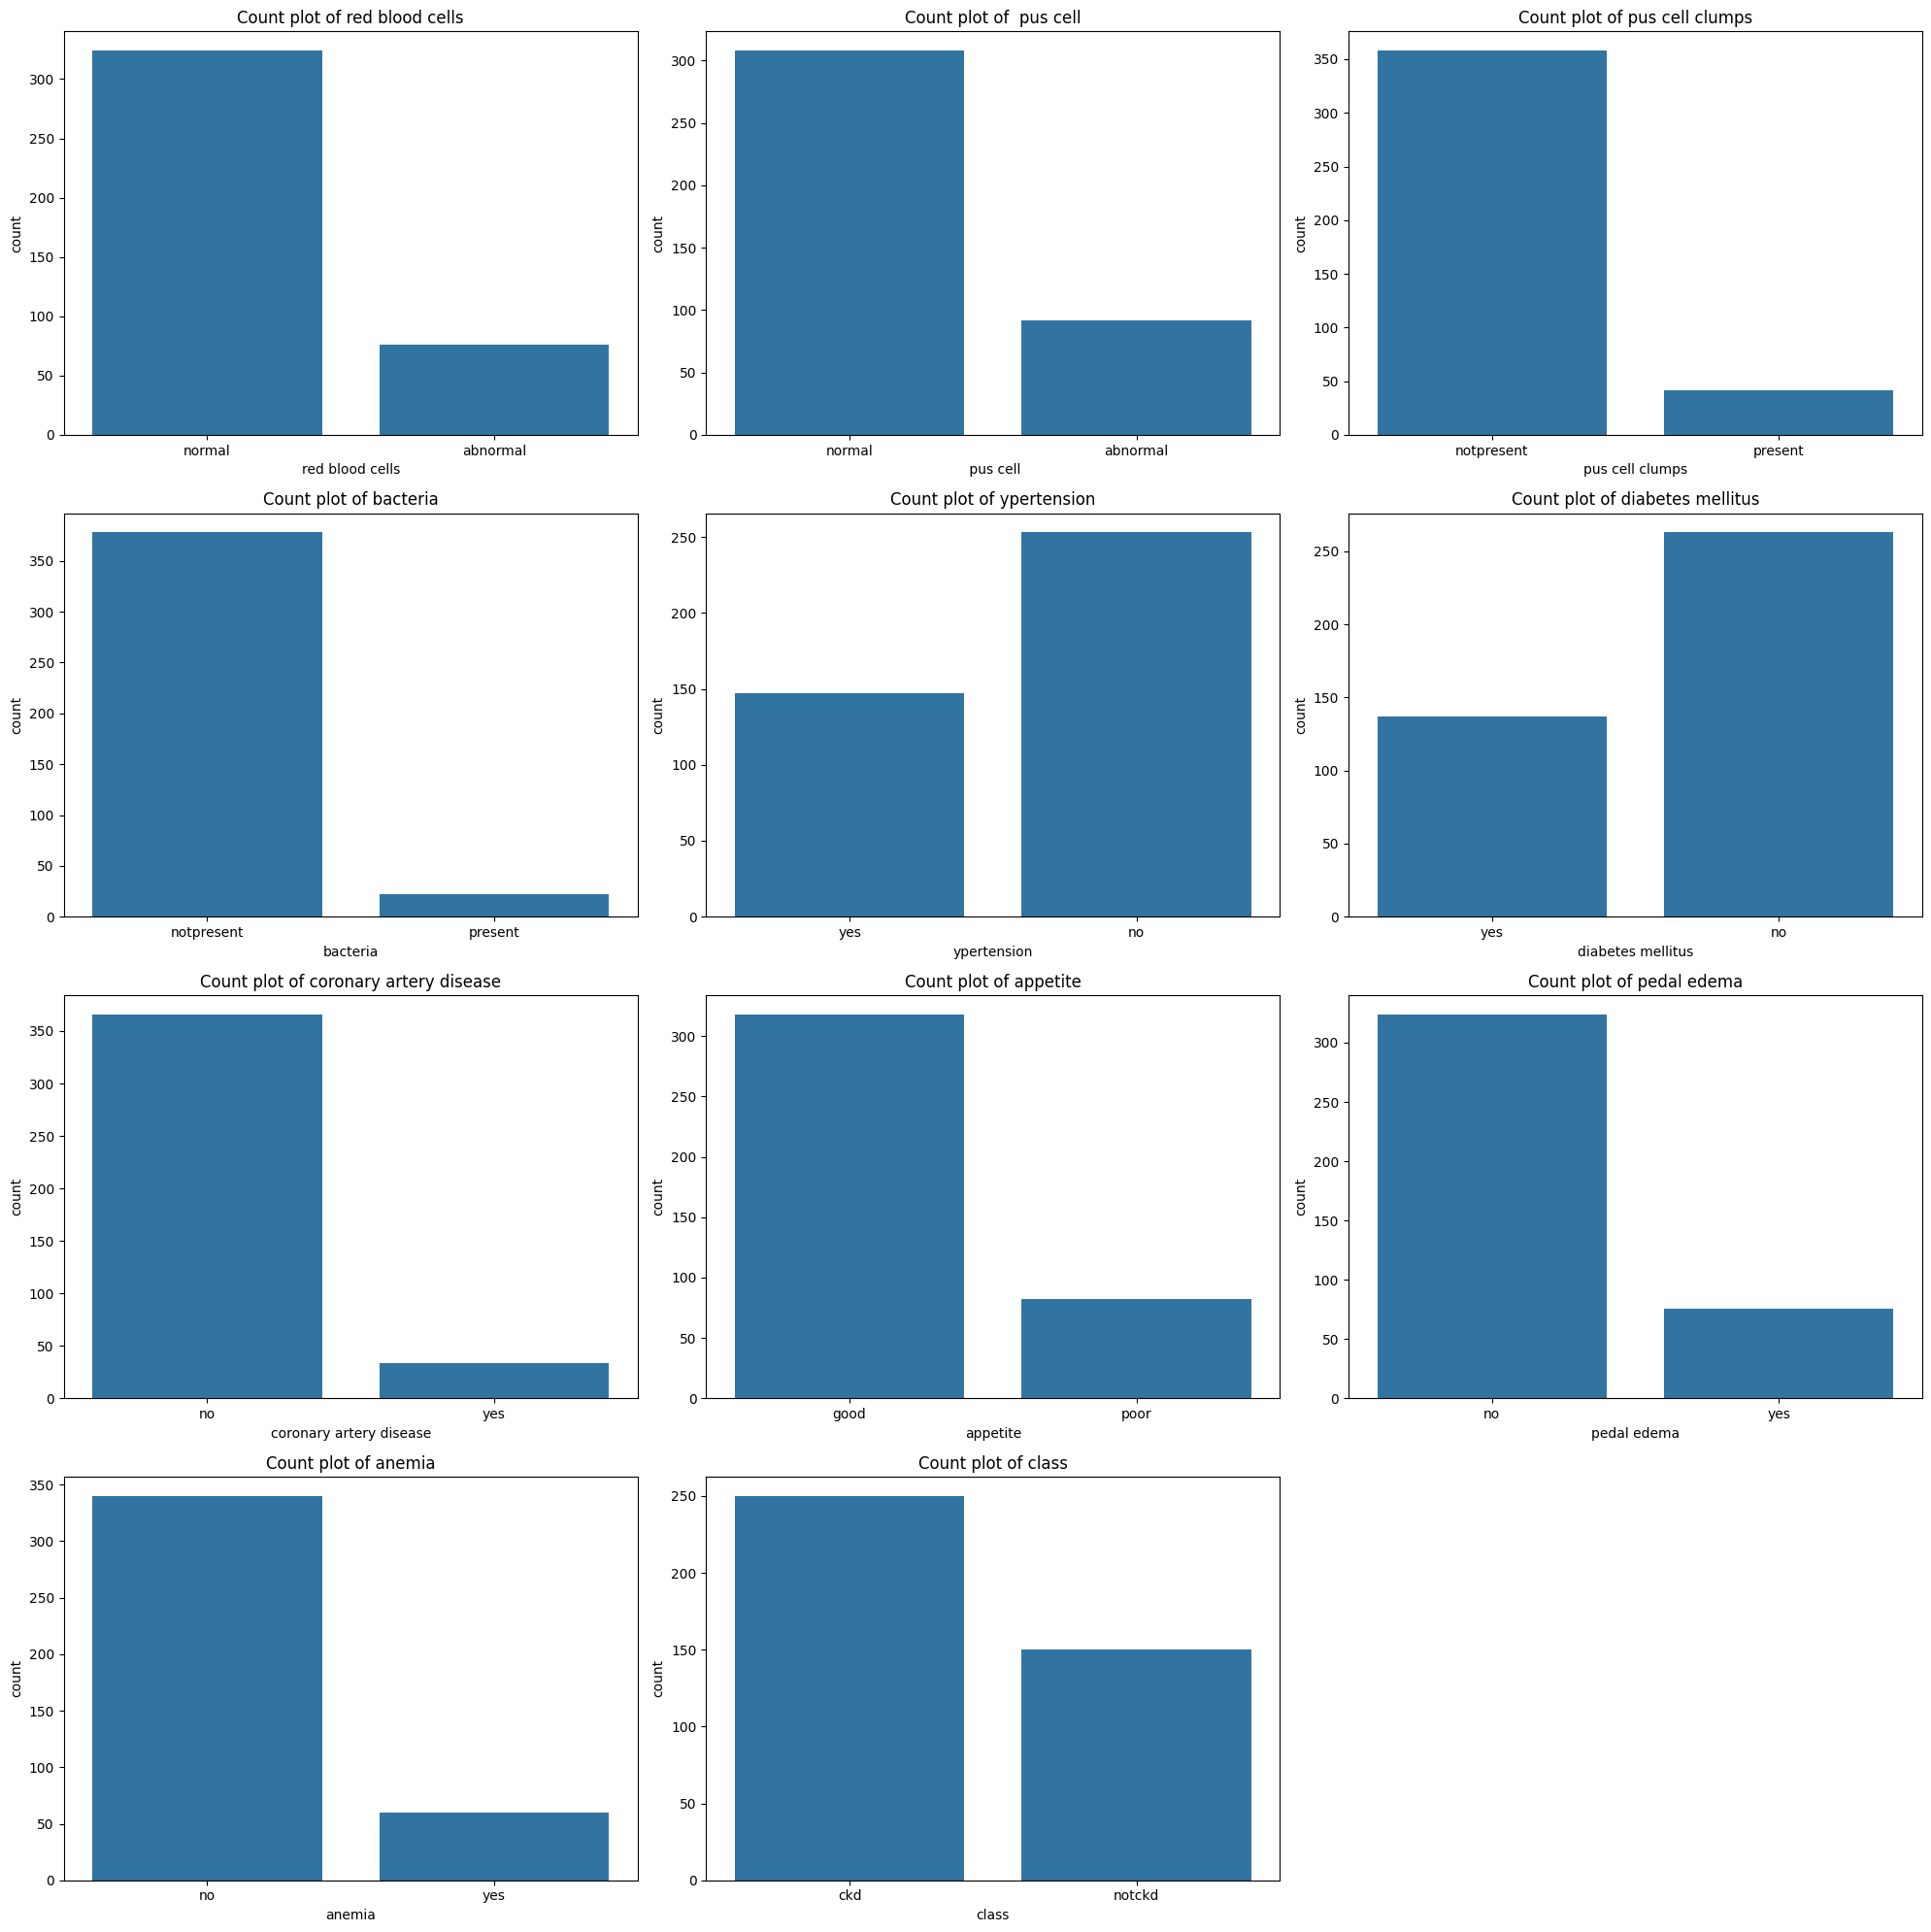

In [30]:
plt.figure(figsize=(20,20))
for i, feature in enumerate(cat_col):
    plt.subplot(4, 3, i + 1)
    sns.countplot(x=feature, data=data)
    plt.title(f'Count plot of {feature}')
plt.tight_layout()
plt.show()


    A few features has imbalanced categories. Stratified folds will be necessary while cross validation.

Text(0.5, 0, 'histogram pedal edema')

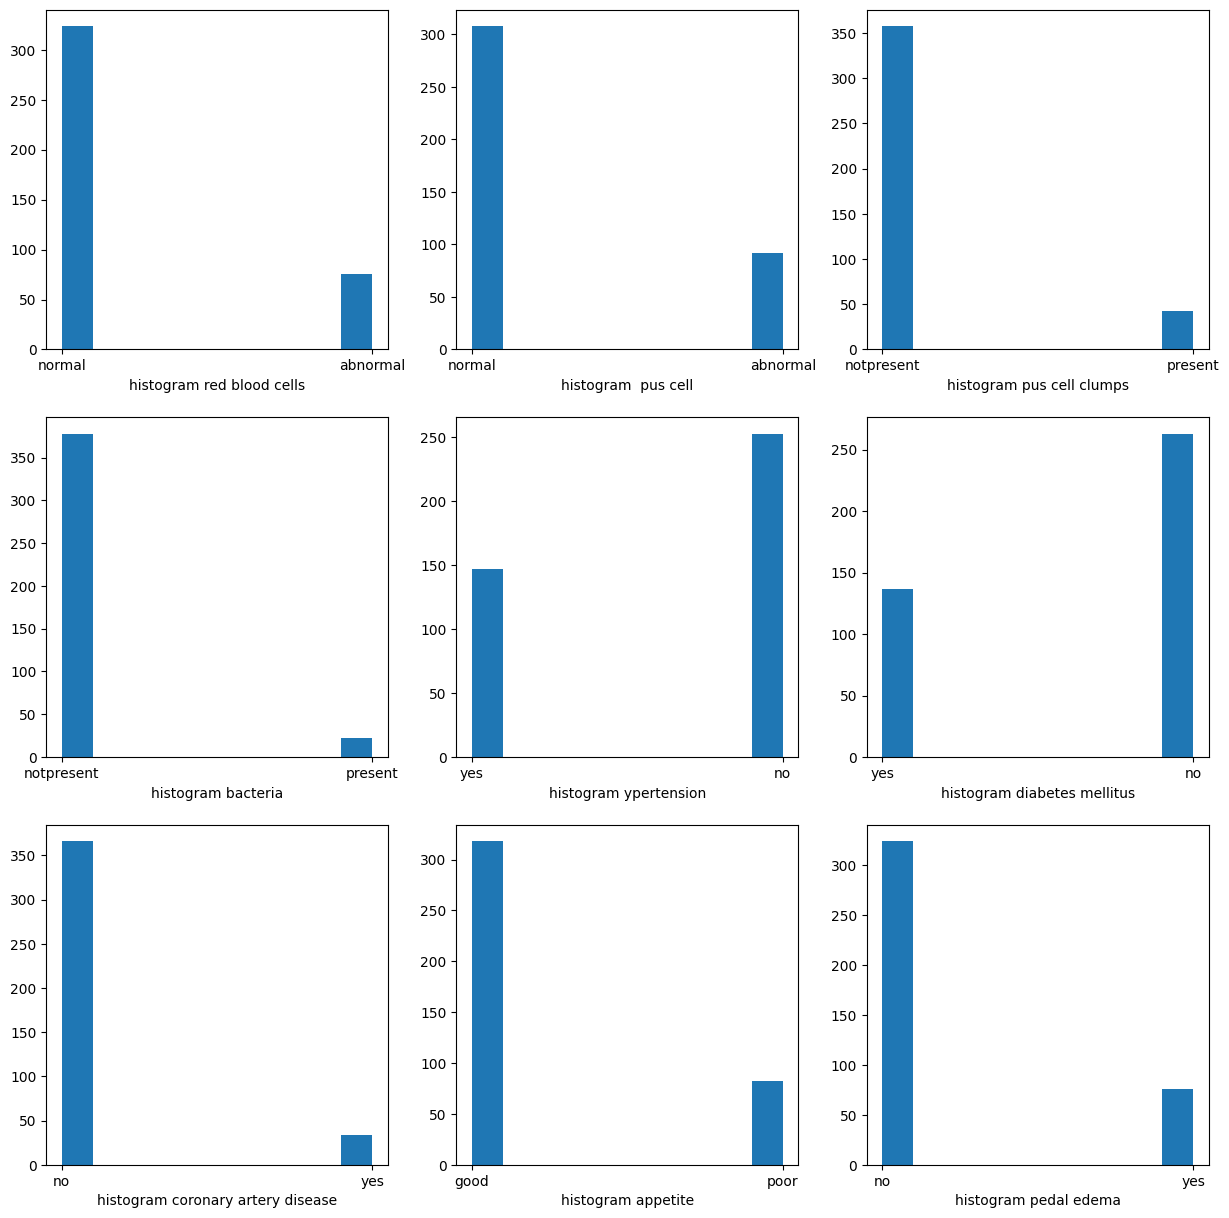

In [31]:
figure, axe = plt.subplots(3,3,figsize=(15, 15))
axe[0,0].hist(data['red blood cells'])
axe[0,0].set_xlabel("histogram red blood cells")
axe[0,1].hist(data[' pus cell'])
axe[0,1].set_xlabel("histogram  pus cell")
axe[0,2].hist(data['pus cell clumps'])
axe[0,2].set_xlabel("histogram pus cell clumps")

axe[1,0].hist(data["bacteria"])
axe[1,0].set_xlabel("histogram bacteria")
axe[1,1].hist(data["ypertension"])
axe[1,1].set_xlabel("histogram ypertension")
axe[1,2].hist(data["diabetes mellitus"])
axe[1,2].set_xlabel("histogram diabetes mellitus")


axe[2,0].hist(data["coronary artery disease"])
axe[2,0].set_xlabel("histogram coronary artery disease")
axe[2,1].hist(data["appetite"])
axe[2,1].set_xlabel("histogram appetite")
axe[2,2].hist(data["pedal edema"])
axe[2,2].set_xlabel("histogram pedal edema")

### Correlations

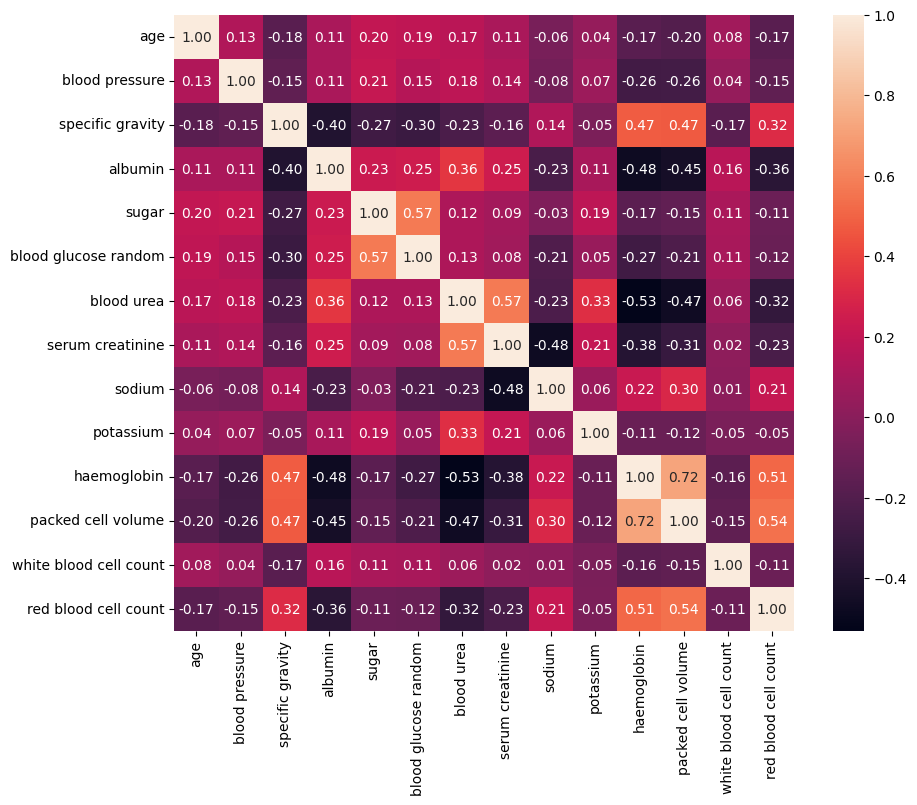

In [32]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_df = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_df, annot=True, fmt='.2f')
plt.show()

    Positive Correlation:
    Specific gravity -> Red blood cell count, Packed cell volume and Hemoglobin
    Sugar -> Blood glucose random
    Blood Urea -> Serum creatinine
    Hemoglobin -> Red Blood cell count <- packed cell volume
    
    Negative Correlation:
    Albumin, Blood urea -> Red blood cell count, packed cell volume, Hemoglobin
    Serum creatinine -> Sodium

In [33]:
data.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max'])

count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        75  4.312000     4.3  2.5  6.5
                notckd      1  5.900000     5.9  5.9  5.9
normal          ckd       175  4.365714     4.3  2.1  8.0
                notckd    149  5.364430     5.3  3.4  6.5

### Let's check for Positive correlation and its impact on classes¶

In [34]:
import plotly.express as px

In [35]:
px.violin(data,y='red blood cell count',x="class", color="class")

In [36]:
px.scatter(df,'haemoglobin','packed cell volume')

### analysing distribution of 'red_blood_cell_count' in both Labels 

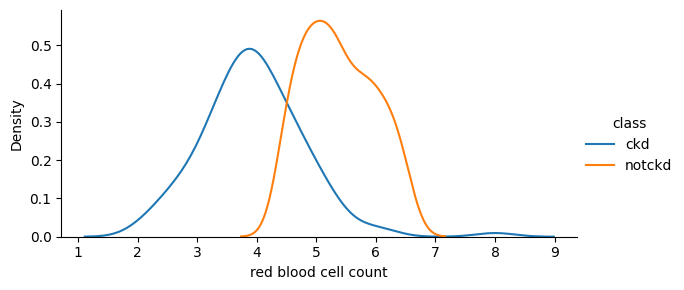

In [37]:
grid=sns.FacetGrid(df, hue="class",aspect=2)
grid.map(sns.kdeplot, 'red blood cell count')
grid.add_legend()

    Both distributions are quite different, distribution CKD is quite normal and evenly distributed but not CKD distribution is a little bit left-skewed but quite close to a normal distribution

#### Defining violin and scatter plot & kde_plot functions

In [38]:
def violin(col):
    fig = px.violin(data, y=col, x="class", color="class", box=True)
    return fig.show()

def scatters(col1,col2):
    fig = px.scatter(data, x=col1, y=col2, color="class")
    return fig.show()

def kde_plot(feature):
    grid = sns.FacetGrid(data, hue="class",aspect=2)
    grid.map(sns.kdeplot, feature)
    grid.add_legend()

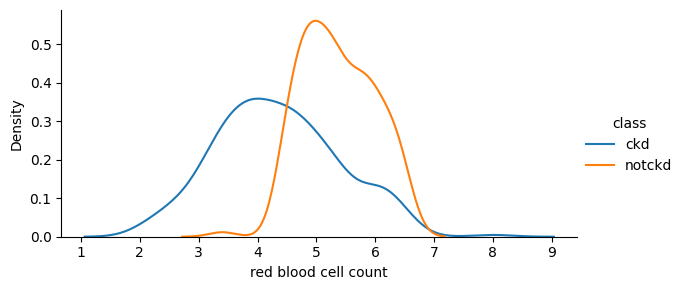

In [39]:
kde_plot('red blood cell count')

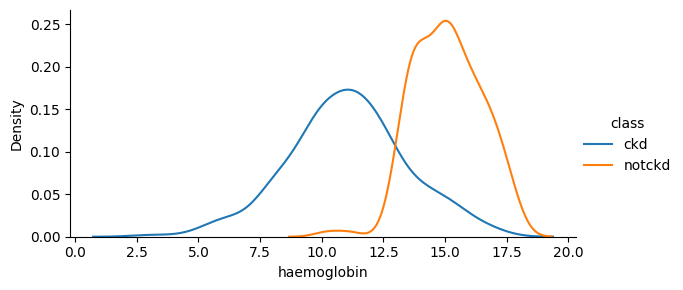

In [40]:
kde_plot('haemoglobin')

In [41]:
scatters('red blood cell count', 'packed cell volume')

In [42]:
scatters('red blood cell count', 'haemoglobin')

In [43]:
scatters('haemoglobin','packed cell volume')

    1.RBC count range ~2 to <4.5 and Hemoglobin between 3 to <13 are mostly classified as positive for chronic kidney  
    disease(i.e ckd).
    2.RBC count range >4.5 to ~6.1 and Hemoglobin between >13 to 17.8 are classified as negative for chronic kidney 
    disease(i.e nockd).

In [44]:
violin('red blood cell count')

In [45]:
violin('packed cell volume')

### Now let's check for negative correlation and its impact on classes

    Albumin, Blood urea -> Red blood cell count, packed cell volume, Haemoglobin

In [46]:
scatters('red blood cell count','albumin')

    Clearly, albumin levels of above 0 affect ckd largely

In [47]:
scatters('packed cell volume','blood urea')

    Packed cell volume >= 40 largely affects to be non ckd

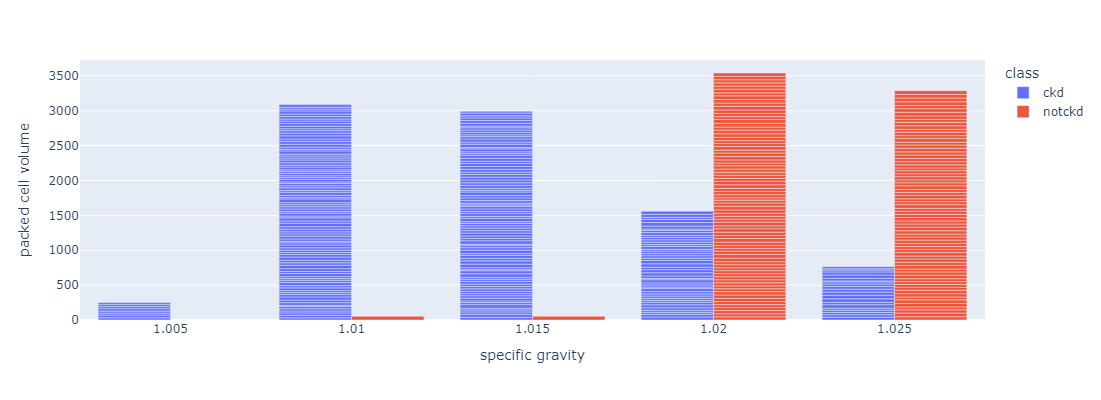

In [48]:
fig = px.bar(data, x="specific gravity", y="packed cell volume",
             color='class', barmode='group',
             height=400)
fig.show()

   

# Feature Encoding / Label Encoder

In [49]:
for col in cat_col:
    print('{} categories in the column- {} '.format(data[col].nunique(), col))
    

2 categories in the column- red blood cells 
2 categories in the column-  pus cell 
2 categories in the column- pus cell clumps 
2 categories in the column- bacteria 
2 categories in the column- ypertension 
2 categories in the column- diabetes mellitus 
2 categories in the column- coronary artery disease 
2 categories in the column- appetite 
2 categories in the column- pedal edema 
2 categories in the column- anemia 
2 categories in the column- class 


#### as we have just 2 categories in each feature then we can consider Label Encoder as it will not cause Curse of Dimensionality

In [50]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in cat_col:
    data[col]=le.fit_transform(data[col])
    
data.head()

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                0   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

    pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0          1                0         0                 121.0  ...   
1          1                0         0                  93.0  ...   
2          1                0         0                 423.0  ...   
3          0                1         0                 117.0  ...   
4          1                0         0                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0                   5.2   
1                38.0                  6000.0                   2.9   
2                31.0                  7500.0                   6.1   
3                32.0                  6700.0                   3.9   
4                35.0                  7300.0                   4.6   

   ypertension  diabetes mellitus  coronary artery disease  appetite  \
0            1                  1                        0         0   
1            0                  0                        0         0   
2            0                  1                        0         1   
3            1                  0                        0         1   
4            0                  0                        0         0   

   pedal edema  anemia  class  
0            0       0      0  
1            0       0      0  
2            0       1      0  
3            1       1      0  
4            0       0      0  

[5 rows x 25 columns]

In [51]:
data

age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0    48.0            80.0             1.020      1.0    0.0                1   
1     7.0            50.0             1.020      4.0    0.0                0   
2    62.0            80.0             1.010      2.0    3.0                1   
3    48.0            70.0             1.005      4.0    0.0                1   
4    51.0            80.0             1.010      2.0    0.0                1   
..    ...             ...               ...      ...    ...              ...   
395  55.0            80.0             1.020      0.0    0.0                1   
396  42.0            70.0             1.025      0.0    0.0                1   
397  12.0            80.0             1.020      0.0    0.0                1   
398  17.0            60.0             1.025      0.0    0.0                1   
399  58.0            80.0             1.025      0.0    0.0                1   

      pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0            1                0         0                 121.0  ...   
1            1                0         0                  93.0  ...   
2            1                0         0                 423.0  ...   
3            0                1         0                 117.0  ...   
4            1                0         0                 106.0  ...   
..         ...              ...       ...                   ...  ...   
395          1                0         0                 140.0  ...   
396          1                0         0                  75.0  ...   
397          1                0         0                 100.0  ...   
398          1                0         0                 114.0  ...   
399          1                0         0                 131.0  ...   

     packed cell volume  white blood cell count  red blood cell count  \
0                  44.0                  7800.0                   5.2   
1                  38.0                  6000.0                   2.9   
2                  31.0                  7500.0                   6.1   
3                  32.0                  6700.0                   3.9   
4                  35.0                  7300.0                   4.6   
..                  ...                     ...                   ...   
395                47.0                  6700.0                   4.9   
396                54.0                  7800.0                   6.2   
397                49.0                  6600.0                   5.4   
398                51.0                  7200.0                   5.9   
399                53.0                  6800.0                   6.1   

     ypertension  diabetes mellitus  coronary artery disease  appetite  \
0              1                  1                        0         0   
1              0                  0                        0         0   
2              0                  1                        0         1   
3              1                  0                        0         1   
4              0                  0                        0         0   
..           ...                ...                      ...       ...   
395            0                  0                        0         0   
396            0                  0                        0         0   
397            0                  0                        0         0   
398            0                  0                        0         0   
399            0                  0                        0         0   

     pedal edema  anemia  class  
0              0       0      0  
1              0       0      0  
2              0       1      0  
3              1       1      0  
4              0       0      0  
..           ...     ...    ...  
395            0       0      1  
396            0       0      1  
397            0       0      1  
398            0       0      1  
399            0       0      1  

[400 

# Feature Selection

In [52]:
from sklearn.feature_selection import SelectKBest #Also known as Information Gain
from sklearn.feature_selection import chi2

ind_col=[col for col in data.columns if col!='class']
dep_col='class'

x=data[ind_col]
y=data[dep_col] 

ordered_rank_features=SelectKBest(score_func=chi2,k=20)
ordered_feature=ordered_rank_features.fit(x,y)

datascores=pd.DataFrame(ordered_feature.scores_,columns=["Score"])

dfcolumns=pd.DataFrame(x.columns)

features_rank=pd.concat([dfcolumns,datascores],axis=1)

features_rank.columns=['Features','Score']

# features_rank.nlargest(10,'Score')  --->  fetch largest 10 values of Score column   

selected_columns=features_rank.nlargest(10,'Score')['Features'].values
X_new=data[selected_columns]
X_new

white blood cell count  blood glucose random  blood urea  \
0                    7800.0                 121.0        36.0   
1                    6000.0                  93.0        18.0   
2                    7500.0                 423.0        53.0   
3                    6700.0                 117.0        56.0   
4                    7300.0                 106.0        26.0   
..                      ...                   ...         ...   
395                  6700.0                 140.0        49.0   
396                  7800.0                  75.0        31.0   
397                  6600.0                 100.0        26.0   
398                  7200.0                 114.0        50.0   
399                  6800.0                 131.0        18.0   

     serum creatinine  packed cell volume  albumin  haemoglobin   age  sugar  \
0                 1.2                44.0      1.0         15.4  48.0    0.0   
1                 0.8                38.0      4.0         11.3   7.0    0.0   
2                 1.8                31.0      2.0          9.6  62.0    3.0   
3                 3.8                32.0      4.0         11.2  48.0    0.0   
4                 1.4                35.0      2.0         11.6  51.0    0.0   
..                ...                 ...      ...          ...   ...    ...   
395               0.5                47.0      0.0         15.7  55.0    0.0   
396               1.2                54.0      0.0         16.5  42.0    0.0   
397               0.6                49.0      0.0         15.8  12.0    0.0   
398               1.0                51.0      0.0         14.2  17.0    0.0   
399               1.1                53.0      0.0         15.8  58.0    0.0   

     ypertension  
0              1  
1              0  
2              0  
3              1  
4              0  
..           ...  
395            0  
396            0  
397            0  
398            0  
399            0  

[400 rows x 10 columns]

# Model

In [53]:
#scaling
column = data.columns

for i in range(24):
    max_val = data[column[i]].max()
    min_val = data[column[i]].min()
    dif = max_val - min_val
    data[column[i]] = (data[column[i]] - min_val) / dif


In [54]:
#splitting the dataset

x=data.drop(columns=['class'],axis=1)
y=data['class']

In [55]:
#KNN
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample data (replace with your actual data)
# x = ...
# y = ...

# Ensure x and y are numpy arrays or pandas DataFrame/Series
x = np.array(x)
y = np.array(y)

# Training the model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

# Test the model
pred = knn.predict(x_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, pred)
print(f"Accuracy: {accuracy}")

# Print the classification report and confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, pred))
print("\nClassification Report:")
print(classification_report(y_test, pred))


Accuracy: 0.975
Confusion Matrix:
[[51  1]
 [ 1 27]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        52
           1       0.96      0.96      0.96        28

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80



In [56]:
#Naive Bayes

#Initializing the Naive Bayes model
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

#Train the model
nb.fit(x_train,y_train)

#test the model
pred=nb.predict(x_test)
pred


# Evaluate the Model performance
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

print(metrics.classification_report(y_test,pred))

from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        52
           1       0.93      0.96      0.95        28

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



0.9625

In [57]:
#SVM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier object
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [58]:
# Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.975
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

svm = SVC()
logreg = LogisticRegression()
decision_tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
naive_bayes = GaussianNB()

ensemble_model = VotingClassifier(estimators=[('svm', svm), ('logreg', logreg), ('decision_tree', decision_tree), ('knn', knn), ('naive_bayes', naive_bayes)], voting='hard')

ensemble_model.fit(X_train, y_train)

y_pred = ensemble_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)



Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        52
           1       1.00      0.96      0.98        28

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [61]:
import pickle
ensemble_model = VotingClassifier(estimators=[('svm', svm), ('logreg', logreg), ('decision_tree', decision_tree), ('knn', knn), ('naive_bayes', naive_bayes)], voting='hard')

ensemble_model.fit(X_train, y_train)
# Save the model as a pickle file
with open('kd.pkl', 'wb') as file:
    pickle.dump(ensemble_model, file)

Confusion matrix of  RandomForest
[[52  0]
 [ 2 26]]
Accuracy score is  0.975
Confusion matrix of  GradientBoosting
[[52  0]
 [ 2 26]]
Accuracy score is  0.975
Confusion matrix of  AdaBoost
[[52  0]
 [ 2 26]]
Accuracy score is  0.975
Confusion matrix of  SVC
[[52  0]
 [ 1 27]]
Accuracy score is  0.9875
Confusion matrix of  KNeighbors
[[49  3]
 [ 1 27]]
Accuracy score is  0.95
Confusion matrix of  LogisticRegression
[[52  0]
 [ 1 27]]
Accuracy score is  0.9875
Confusion matrix of  DecisionTree
[[51  1]
 [ 2 26]]
Accuracy score is  0.9625
Confusion matrix of  GaussianNB
[[52  0]
 [ 1 27]]
Accuracy score is  0.9875
Confusion matrix of  XGBClassifier
[[51  1]
 [ 2 26]]
Accuracy score is  0.9625
Confusion matrix of  XGBRFClassifier
[[52  0]
 [ 2 26]]
Accuracy score is  0.975
[LightGBM] [Info] Number of positive: 122, number of negative: 198
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the 

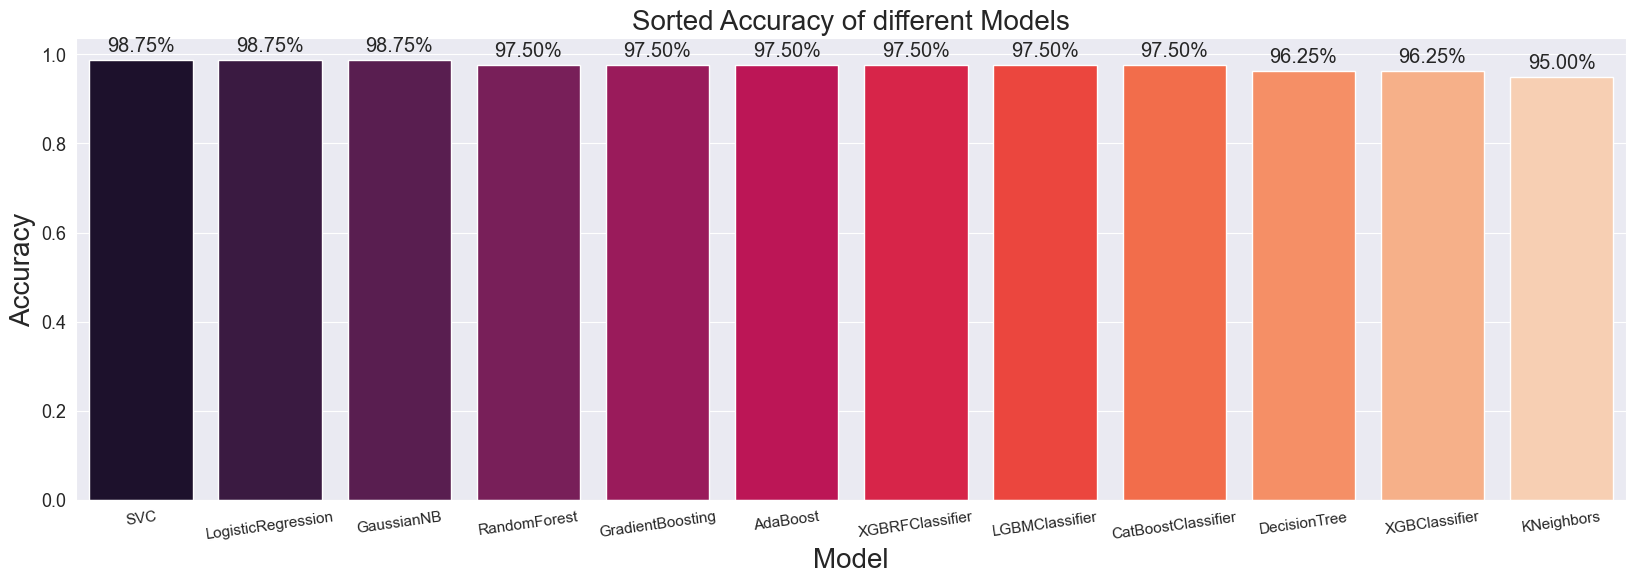

In [62]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define your models and their names
models = [
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=200),  # increased max_iter for convergence
    DecisionTreeClassifier(),
    GaussianNB(),
    XGBClassifier(),
    XGBRFClassifier(),
    LGBMClassifier(),
    CatBoostClassifier()
]

names = [
    'RandomForest',
    'GradientBoosting',
    'AdaBoost',
    'SVC',
    'KNeighbors',
    'LogisticRegression',
    'DecisionTree',
    'GaussianNB',
    'XGBClassifier',
    'XGBRFClassifier',
    'LGBMClassifier',
    'CatBoostClassifier'
]

accuracy = []  # Initialize accuracy as an empty list

for model, name in zip(models, names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Confusion matrix of ', name)
    print(confusion_matrix(y_test, y_pred))
    ac = accuracy_score(y_test, y_pred)
    print('Accuracy score is ', ac)
    accuracy.append(ac)
    print('='*50)

# Sorting accuracy results
Accuracy_list = pd.DataFrame(list(zip(names, accuracy)), columns=['Model', 'Accuracy'])
Accuracy_list = Accuracy_list.sort_values('Accuracy', axis=0, ascending=False, inplace=False, ignore_index=True)

# Plotting results
plt.rcParams['figure.figsize'] = 20, 6
sns.set_style('darkgrid')
ax = sns.barplot(x='Model', y='Accuracy', data=Accuracy_list, palette='rocket', saturation=1.5)
plt.xlabel('Model', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.title('Sorted Accuracy of different Models', fontsize=20)
plt.xticks(fontsize=11, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize='x-large')
plt.show()
